**Classification of WHO Situation Report Data**

**Universidade do Porto** 

**Faculdade de Engenharia**

**Integrated Masters in Informatics and Computting Engineering**

**Artificial Intelligence (IART)**


Work by:
- Hugo Daniel Gonçalves Fernandes, up201909576
- Ricardo Fontoura de Aguiar Pinto, up201909580
- João Miguel dos Santos de Lima Monteiro, up201705580

***Abstract - This article encompasses the exploratory analysis, data adjusting, modeling, and classification of data from situation reports of the WHO about the ongoing COVID-19 pandemic. As well as comparisons between the performances of algorithms used in the modeling process***


# Introduction

This project aims to use machine learning, with special attention to supervised learning, to build classification models for a specific dataset this includes performing an exploratory data analysis, preprocessing and transforming the data, identifying of the dependent variables, defining the training the testing datasets, implementing the algorithms and classifying results obtained by comparing performance metrics.

In order to achieve this goal, we use the python library *Pandas* to load the data into the notebook as data frames then proceed to use the *Sci kit learn* library to implement the learning algorithms, to graphically present the algorithm's prediction results and to compare performance metrics of each algorithm we used the *MatplotLib* library.

# Description of the dataset

## Base Dataset

The data frame being utilized features data from the WHO situation reports from 2020-01-22 to 2020-05-21 (currently) for 188 different countries. Each entry in this data consists of the following variables:

- **Province/State**: Specifies which state or province of a specific country the data in the entry belongs to.
- **Country/Region**: Country or region of where the data is from.
- **Lat**: Latitude of the specific Country or Province.
- **Long**: Longitude of the specific Country or Province.
- **Date**: Date of the day the situation report this entry is from was written.
- **Confirmed**: Total number of confirmed COVID-19 cases up to and including the day of the entry.
- **Deaths**: Total number of deaths of confirmed cases up to and including the day of the entry.
- **Recovered**: Total number of total patients that had the virus and recovered up to and including the day of the entry.


This data, while very useful for analysis of the overall COVID-19 pandemic that is unfolding, does not provide any variable that we could model an algorithm to classify. Which means we will have to create a dependent variable for classification. Also, we will create other variables calculated from the present data, this is to offset the fact that, although the data tells us a lot of information, an algorithm trying to establish a model of classification might have issues drawing the proper correlations between the variables presented.

### Importing the Dataset

Using the *Pandas* python library we import the data from the original *.csv* and display a portion of the dataset created:


In [1]:
import pandas as pd
import numpy as np
imported_df = pd.read_csv('Data/covid_19_clean_complete.csv')
display(imported_df)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
32060,NaN,Sao Tome and Principe,0.186360,6.613081,5/21/20,251,8,4
32061,NaN,Yemen,15.552727,48.516388,5/21/20,197,33,0
32062,NaN,Comoros,-11.645500,43.333300,5/21/20,34,1,8
32063,NaN,Tajikistan,38.861034,71.276093,5/21/20,2350,44,0


### Verifying the absence of nulls

In [2]:
imported_df.isnull().sum()


Province/State    22385
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

## Changes to existing variables

Some variables in the original data aren't in the ideal format (Date) or due to the complexity they introduced were removed and the overall data adjusted to fill their absence (Province/State).

### Date

We proceeded to change the format the *date* column is presented in from a regular MM/DD/YY to a counter, from the first day recorded in the dataset 22-01-2020 onwards, this counter starts at 0 and at the moment progresses up to 120 days after the first one this change was implemented due to previous problems utilizing *date* formats as components of a model creating algorithm in previous classes.

In [3]:
imported_df['Date'] = pd.to_datetime(imported_df['Date'])
x = pd.to_datetime('2020-01-22')
imported_df['Day'] = (imported_df['Date'] - x).dt.days
del imported_df['Date']
display(imported_df)

,Province/State,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Day
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0
...,...,...,...,...,...,...,...,...
32060,NaN,Sao Tome and Principe,0.186360,6.613081,251,8,4,120
32061,NaN,Yemen,15.552727,48.516388,197,33,0,120
32062,NaN,Comoros,-11.645500,43.333300,34,1,8,120
32063,NaN,Tajikistan,38.861034,71.276093,2350,44,0,120


### Province/State

We decided to remove this particular column and combine all the data from a country into one entry per day, not only to reduce the number of rows in the dataset but also because many of these states and provinces had very small numbers of infected, which made us believe that classifying the overall countrywide situation would be more valuable.

In [4]:
del imported_df['Province/State']
new_df = imported_df.groupby(['Country/Region','Day']).agg({'Lat': 'first', 'Long': 'first', 'Confirmed': 'sum',
'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()
display(new_df)

,Country/Region,Day,Lat,Long,Confirmed,Deaths,Recovered
0,Afghanistan,0,33.0,65.0,0,0,0
1,Afghanistan,1,33.0,65.0,0,0,0
2,Afghanistan,2,33.0,65.0,0,0,0
3,Afghanistan,3,33.0,65.0,0,0,0
4,Afghanistan,4,33.0,65.0,0,0,0
...,...,...,...,...,...,...,...
22743,Zimbabwe,116,-20.0,30.0,44,4,17
22744,Zimbabwe,117,-20.0,30.0,46,4,18
22745,Zimbabwe,118,-20.0,30.0,46,4,18
22746,Zimbabwe,119,-20.0,30.0,48,4,18


## New Variables Created

To increase the amount of data that the algorithms will have to determine if the dependent variable is true or false we created multiple new columns with data calculated from the original data.

### Active_Cases

This variable consists of the number of current active cases in a given day, this number is determined by taking the total number of confirmed cases and subtracting the number of total recovered patients and total deaths.

In [5]:
new_df['Active_Cases'] = new_df['Confirmed'] - (new_df['Deaths']+new_df['Recovered'])
display(new_df)

,Country/Region,Day,Lat,Long,Confirmed,Deaths,Recovered,Active_Cases
0,Afghanistan,0,33.0,65.0,0,0,0,0
1,Afghanistan,1,33.0,65.0,0,0,0,0
2,Afghanistan,2,33.0,65.0,0,0,0,0
3,Afghanistan,3,33.0,65.0,0,0,0,0
4,Afghanistan,4,33.0,65.0,0,0,0,0
...,...,...,...,...,...,...,...,...
22743,Zimbabwe,116,-20.0,30.0,44,4,17,23
22744,Zimbabwe,117,-20.0,30.0,46,4,18,24
22745,Zimbabwe,118,-20.0,30.0,46,4,18,24
22746,Zimbabwe,119,-20.0,30.0,48,4,18,26


### Yesterdays_Confirmed_Cases

This variable was created to facilitate the creation of another variable, that compares the number of confirmed cases of the current day with the number of cases of the day before.

In [6]:
new_df['Yesterdays_Confirmed_Cases'] = new_df['Confirmed'].shift()                    
new_df.loc[new_df['Day'] < 1, 'Yesterdays_Confirmed_Cases'] = new_df['Confirmed']
display(new_df)

,Country/Region,Day,Lat,Long,Confirmed,Deaths,Recovered,Active_Cases,Yesterdays_Confirmed_Cases
0,Afghanistan,0,33.0,65.0,0,0,0,0,0.0
1,Afghanistan,1,33.0,65.0,0,0,0,0,0.0
2,Afghanistan,2,33.0,65.0,0,0,0,0,0.0
3,Afghanistan,3,33.0,65.0,0,0,0,0,0.0
4,Afghanistan,4,33.0,65.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
22743,Zimbabwe,116,-20.0,30.0,44,4,17,23,42.0
22744,Zimbabwe,117,-20.0,30.0,46,4,18,24,44.0
22745,Zimbabwe,118,-20.0,30.0,46,4,18,24,46.0
22746,Zimbabwe,119,-20.0,30.0,48,4,18,26,46.0


### Increase_in_Cases

This variable is the aforementioned variable that compares the data in the *Confirmed* column with the data in the *Yesterdays_Confirmed_Cases* column. This variable we believe is highly important not only to set the training test of our dependent variable but also will have a high correlation with the dependent variable.

In [7]:
new_df['Increase_in_Cases'] = new_df['Confirmed']-new_df['Yesterdays_Confirmed_Cases']
display(new_df)

,Country/Region,Day,Lat,Long,Confirmed,Deaths,Recovered,Active_Cases,Yesterdays_Confirmed_Cases,Increase_in_Cases
0,Afghanistan,0,33.0,65.0,0,0,0,0,0.0,0.0
1,Afghanistan,1,33.0,65.0,0,0,0,0,0.0,0.0
2,Afghanistan,2,33.0,65.0,0,0,0,0,0.0,0.0
3,Afghanistan,3,33.0,65.0,0,0,0,0,0.0,0.0
4,Afghanistan,4,33.0,65.0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
22743,Zimbabwe,116,-20.0,30.0,44,4,17,23,42.0,2.0
22744,Zimbabwe,117,-20.0,30.0,46,4,18,24,44.0,2.0
22745,Zimbabwe,118,-20.0,30.0,46,4,18,24,46.0,0.0
22746,Zimbabwe,119,-20.0,30.0,48,4,18,26,46.0,2.0


## Dependent Variable for Classification

Due to the previously stated fact that the base dataset has no categorical variable we could use as a dependent variable in a classification problem we need to define our own dependent categorical variable.

### Will_Infection_Ratio_Increase

Named Will_Infection_Ratio_Increase this variable will be the dependent variable of our classification prediction model, this variable indicates if the increase of cases will be larger the following day. This means that for any given entry in the data this variable compares the current day's *Increase_in_Cases* and the following day's *Increase_in_Cases*.
Of course for starters in order to create the models, we will have to correctly populate this variable, after the models are created based on the correct dataset we can then run them against the same dataset and determine statistics such as accuracy of predictions among others.

In [8]:
new_df['Will_Infection_Ratio_Increase'] = (new_df['Increase_in_Cases'].shift(-1) - new_df['Increase_in_Cases'] ) > 0                  
new_df.loc[new_df['Day'] < 1, 'Will_Infection_Ratio_Increase'] = True
display(new_df)

,Country/Region,Day,Lat,Long,Confirmed,Deaths,Recovered,Active_Cases,Yesterdays_Confirmed_Cases,Increase_in_Cases,Will_Infection_Ratio_Increase
0,Afghanistan,0,33.0,65.0,0,0,0,0,0.0,0.0,True
1,Afghanistan,1,33.0,65.0,0,0,0,0,0.0,0.0,False
2,Afghanistan,2,33.0,65.0,0,0,0,0,0.0,0.0,False
3,Afghanistan,3,33.0,65.0,0,0,0,0,0.0,0.0,False
4,Afghanistan,4,33.0,65.0,0,0,0,0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...
22743,Zimbabwe,116,-20.0,30.0,44,4,17,23,42.0,2.0,False
22744,Zimbabwe,117,-20.0,30.0,46,4,18,24,44.0,2.0,False
22745,Zimbabwe,118,-20.0,30.0,46,4,18,24,46.0,0.0,True
22746,Zimbabwe,119,-20.0,30.0,48,4,18,26,46.0,2.0,True


## Data filtering

In order to filter out unnecessary data in the dataset we decided to filter out entries we deemed of little value.

### Removing entries from countries when they have no cases

We decided to remove entries in which countries have 0 confirmed cases mainly for two reasons, first, the amount of lines this encompasses in the dataset is quite substantial, because many countries didn't get their first cases of the virus until months after the start of data collection, second, although it might be said that the empty lines might help the algorithm not consider a country's rise in numbers to be too late in the overall recording period and overcompensate by over predicting increases in cases the same can be said for the opposite, keeping the 0 confirmed cases lines might make the algorithm overcompensate and slow down predictions of increases. So we decided the best course of action would be to remove the lines since this type of data an overestimation would be preferable to an underestimation.

In [9]:
new_df = new_df[new_df.Confirmed != 0]
new_df = new_df.reset_index(drop=True)
display(new_df)

,Country/Region,Day,Lat,Long,Confirmed,Deaths,Recovered,Active_Cases,Yesterdays_Confirmed_Cases,Increase_in_Cases,Will_Infection_Ratio_Increase
0,Afghanistan,33,33.0,65.0,1,0,0,1,0.0,1.0,False
1,Afghanistan,34,33.0,65.0,1,0,0,1,1.0,0.0,False
2,Afghanistan,35,33.0,65.0,1,0,0,1,1.0,0.0,False
3,Afghanistan,36,33.0,65.0,1,0,0,1,1.0,0.0,False
4,Afghanistan,37,33.0,65.0,1,0,0,1,1.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...
14687,Zimbabwe,116,-20.0,30.0,44,4,17,23,42.0,2.0,False
14688,Zimbabwe,117,-20.0,30.0,46,4,18,24,44.0,2.0,False
14689,Zimbabwe,118,-20.0,30.0,46,4,18,24,46.0,0.0,True
14690,Zimbabwe,119,-20.0,30.0,48,4,18,26,46.0,2.0,True


# Approach

In this section, we elaborate on the algorithms used, the implementation of said algorithms, and basic results that will later be paired with graphs in the experimental evaluation of section 4 to analyze the results.

## Preprocessing

### Turning Countries and Regions into labeled variables

Sci kit learn isn't compatible with using strings as a part of the models, so we must turn the countries and regions into numbers.

At first, we attempted to use *OneHotLabel*, to identify the countries this however wasn’t possible because we have 188 countries this would add 188 columns to each of our over 14 thousand entries. So although not being as correct because the algorithms will consider the countries as numbers that will weigh in on the decision we think it's more appropriate.

In [10]:
# creating instance of labelencoder
from sklearn.preprocessing import LabelEncoder
contrylabelencoder = LabelEncoder()# Assigning numerical values and storing in another column
new_df['Country/Region'] = contrylabelencoder.fit_transform(new_df['Country/Region'])
display(new_df)

,Country/Region,Day,Lat,Long,Confirmed,Deaths,Recovered,Active_Cases,Yesterdays_Confirmed_Cases,Increase_in_Cases,Will_Infection_Ratio_Increase
0,0,33,33.0,65.0,1,0,0,1,0.0,1.0,False
1,0,34,33.0,65.0,1,0,0,1,1.0,0.0,False
2,0,35,33.0,65.0,1,0,0,1,1.0,0.0,False
3,0,36,33.0,65.0,1,0,0,1,1.0,0.0,False
4,0,37,33.0,65.0,1,0,0,1,1.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...
14687,187,116,-20.0,30.0,44,4,17,23,42.0,2.0,False
14688,187,117,-20.0,30.0,46,4,18,24,44.0,2.0,False
14689,187,118,-20.0,30.0,46,4,18,24,46.0,0.0,True
14690,187,119,-20.0,30.0,48,4,18,26,46.0,2.0,True


### Order table entries by day and country

Ordering the entries by day for the creation of the X and y subsets that follow.

In [11]:
new_df = new_df.sort_values(by=['Day','Country/Region'])
new_df = new_df.reset_index(drop=True)
display(new_df)

,Country/Region,Day,Lat,Long,Confirmed,Deaths,Recovered,Active_Cases,Yesterdays_Confirmed_Cases,Increase_in_Cases,Will_Infection_Ratio_Increase
0,36,0,31.825700,117.226400,548,17,28,503,548.0,0.0,True
1,87,0,36.000000,138.000000,2,0,0,2,2.0,0.0,True
2,156,0,36.000000,128.000000,1,0,0,1,1.0,0.0,True
3,165,0,23.700000,121.000000,1,0,0,1,1.0,0.0,True
4,168,0,15.000000,101.000000,2,0,0,2,2.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
14687,183,120,31.952200,35.233200,423,2,346,75,398.0,25.0,False
14688,184,120,24.215500,-12.885800,6,0,6,0,6.0,0.0,False
14689,185,120,15.552727,48.516388,197,33,0,164,184.0,13.0,False
14690,186,120,-15.416700,28.283300,866,7,302,557,832.0,34.0,False


### Defining subset X and subset y for the modeling

In the model fitting process, we will need a subset that contains all the independent variable columns (X) and a set that contains our dependent variable column (y). These sets will be used to split the data into train sets and test sets later.

In [12]:
X = new_df.drop('Will_Infection_Ratio_Increase',axis = 1)
y = new_df['Will_Infection_Ratio_Increase']
display(X)
display(y)

,Country/Region,Day,Lat,Long,Confirmed,Deaths,Recovered,Active_Cases,Yesterdays_Confirmed_Cases,Increase_in_Cases
0,36,0,31.825700,117.226400,548,17,28,503,548.0,0.0
1,87,0,36.000000,138.000000,2,0,0,2,2.0,0.0
2,156,0,36.000000,128.000000,1,0,0,1,1.0,0.0
3,165,0,23.700000,121.000000,1,0,0,1,1.0,0.0
4,168,0,15.000000,101.000000,2,0,0,2,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
14687,183,120,31.952200,35.233200,423,2,346,75,398.0,25.0
14688,184,120,24.215500,-12.885800,6,0,6,0,6.0,0.0
14689,185,120,15.552727,48.516388,197,33,0,164,184.0,13.0
14690,186,120,-15.416700,28.283300,866,7,302,557,832.0,34.0


0         True
1         True
2         True
3         True
4         True
         ...  
14687    False
14688    False
14689    False
14690    False
14691    False
Name: Will_Infection_Ratio_Increase, Length: 14692, dtype: bool

### Splitting X and y into train and test sets

After defining the X and y subsets we use them to create more subsets. Train subsets comprised of 80% of the data from which the model will learn and be fitted for, and Test subsets comprised of 20% that will run through the model and then compared to their intended outcome so that we can evaluate the performance of the model.

In [13]:
from sklearn.model_selection import train_test_split

#split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

### Scaling the data

Scaling of the data in the dataset is very important when creating models, an algorithm can't see the difference between a time period of 100 days or a number of confirmed cases as high as 200 thousand. This is why data must be scaled. In this particular case, we performed a standardization of the data, which means that it will adjust the values in a way that each column has a mean of 0 and a variance of 1.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Algorithms

For this project, we were required to utilize three supervised learning algorithms, for the classification of our dependent variable, and then compare performance metrics (*precision*, *recall*, *accuracy*, *F-measure* and run time) of each algorithm with the others.  We also used *timeit* to get the runtime of each algorithm.

### Classification Report
The classification report is a function of the *skilearn.metricx* library, we print out the details of this report which include: precision, recall, f1-score, support, accuracy, macro average, and weighted average.

### Confusion matrix
The confusion matrix is often used to describe the performance of a classification model since it compares the predicted values and the actual values that would be correct, in this way providing the number of correct predictions, false positives, false negatives, and wrong predictions.

### Random Forrest

Random decision forests are a learning method that can be used for classification and regression. The method consists of constructing multiple decision trees and, in this case for classification, the predicted outcome will be the mode of the suggestion of the collective of decision trees.

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import timeit

start_time_RF = timeit.default_timer()

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

elapsed_rf = timeit.default_timer() - start_time_RF

#### Classification report

In [16]:
reportRF = classification_report(y_test,pred_rfc,output_dict=True)
print(classification_report(y_test,pred_rfc))
print(elapsed_rf, 'seconds')

              precision    recall  f1-score   support

       False       0.68      0.75      0.72      1801
        True       0.53      0.45      0.49      1138

    accuracy                           0.63      2939
   macro avg       0.61      0.60      0.60      2939
weighted avg       0.63      0.63      0.63      2939

6.0834334000000005 seconds


#### Confusion matrix

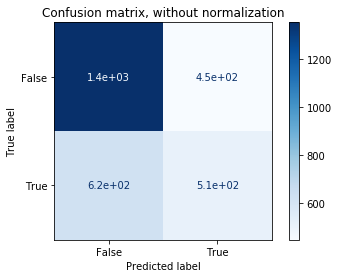

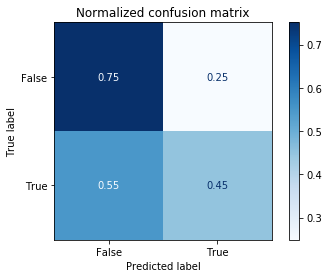

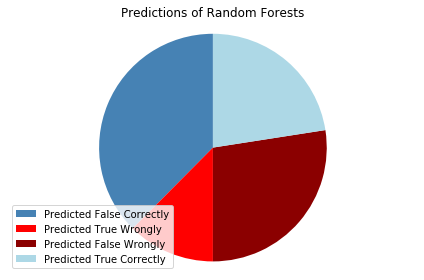

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

class_names = ['False','True']
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rfc, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

cmRF = confusion_matrix(y_test, pred_rfc,normalize=normalize)

sRF = np.array(cmRF[0])
sizesRF = np.append (sRF, cmRF[1])

# -- coding: UTF-8 --
import matplotlib.pyplot as plt
# The slices will be ordered and plotted counter-clockwise.
labels = [r'Predicted False Correctly', r'Predicted True Wrongly',  r'Predicted False Wrongly',
r'Predicted True Correctly']
colors = ['steelblue', 'red', 'darkred', 'lightblue']
patches, texts = plt.pie(sizesRF, colors=colors, startangle=90)
plt.legend(patches, labels, loc="lower left")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.title('Predictions of Random Forests')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Support Vector Machine
SVM is a supervised learning model that creates a model by trying to separate the data for each label, this can lead to highly inconsistent data being unreliable when using this learning model, the dataset we are using is inconsistent which created problems for this model.

In [18]:
from sklearn.svm import SVC
from sklearn import svm

start_time_SVM = timeit.default_timer()

svmc = svm.SVC()
svmc.fit(X_train,y_train)
pred_svmc = svmc.predict(X_test)

elapsed_svm = timeit.default_timer() - start_time_SVM

#### Classification Report

In [19]:
reportSVM = classification_report(y_test,pred_svmc,output_dict=True)
print(classification_report(y_test,pred_svmc))
print(elapsed_svm, 'seconds')

              precision    recall  f1-score   support

       False       0.61      0.98      0.75      1801
        True       0.44      0.03      0.06      1138

    accuracy                           0.61      2939
   macro avg       0.53      0.50      0.41      2939
weighted avg       0.55      0.61      0.48      2939

7.337272199999999 seconds


#### Confusion Matrix

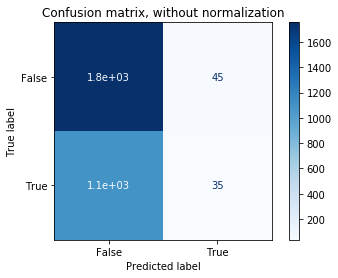

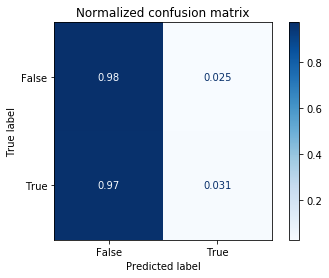

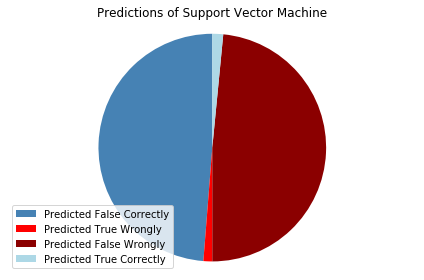

In [20]:
class_names = ['False','True']
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svmc, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

cmSVM = confusion_matrix(y_test, pred_svmc,normalize=normalize)

sSVM = np.array(cmSVM[0])
sizesSVM = np.append (sSVM, cmSVM[1])

# -- coding: UTF-8 --
import matplotlib.pyplot as plt
# The slices will be ordered and plotted counter-clockwise.
labels = [r'Predicted False Correctly', r'Predicted True Wrongly',  r'Predicted False Wrongly',
r'Predicted True Correctly']
colors = ['steelblue', 'red', 'darkred', 'lightblue']
patches, texts = plt.pie(sizesSVM, colors=colors, startangle=90)
plt.legend(patches, labels, loc="lower left")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.title('Predictions of Support Vector Machine')
plt.axis('equal')
plt.tight_layout()
plt.show()

### Neural Network

Neural networks are modeled loosely after the human brain's pattern recognition. Data is interpreted through vectors of numerical values and the algorithm tries to find numerical patterns.

In [21]:
from sklearn.neural_network import MLPClassifier

start_time_NN = timeit.default_timer()

mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc = mlpc.predict(X_test)

elapsed_NN = timeit.default_timer() - start_time_NN

#### Classification Report

In [22]:
reportNN = classification_report(y_test,pred_mlpc,output_dict=True)
print(classification_report(y_test,pred_mlpc))
print(elapsed_NN, 'seconds')

              precision    recall  f1-score   support

       False       0.66      0.73      0.69      1801
        True       0.49      0.40      0.44      1138

    accuracy                           0.60      2939
   macro avg       0.57      0.57      0.57      2939
weighted avg       0.59      0.60      0.60      2939

13.298021000000002 seconds


#### Confusion Matrix

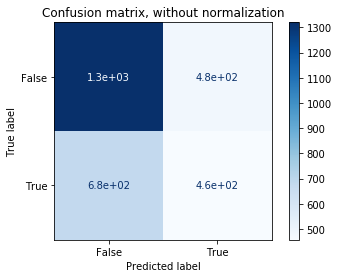

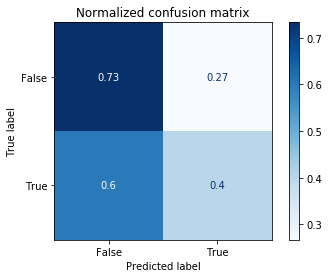

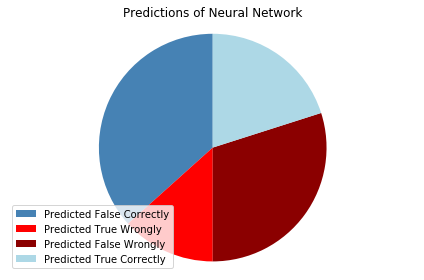

In [23]:
class_names = ['False','True']
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(mlpc, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

cmNN = confusion_matrix(y_test, pred_mlpc,normalize=normalize)


sNN = np.array(cmNN[0])
sizesNN = np.append (sNN, cmNN[1])

# -- coding: UTF-8 --
import matplotlib.pyplot as plt
# The slices will be ordered and plotted counter-clockwise.
labels = [r'Predicted False Correctly', r'Predicted True Wrongly',  r'Predicted False Wrongly',
r'Predicted True Correctly']
colors = ['steelblue', 'red', 'darkred', 'lightblue']
patches, texts = plt.pie(sizesNN, colors=colors, startangle=90)
plt.legend(patches, labels, loc="lower left")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.title('Predictions of Neural Network')
plt.axis('equal')
plt.tight_layout()
plt.show()

### K-Nearest Neighbor

K-NN is a lazy learning algorithm where the prediction is made by approximating locally we believe this might be the cause of the problems this algorithm's result presents, it fully predicts false for every entry. Because of this, we won't compare the results from this algorithm in the next section of the report.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

start_time_knc = timeit.default_timer()
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X, y)
pred_knc = knc.predict(X_test)
elapsed_knc = timeit.default_timer() - start_time_knc

#### Classification Report

In [25]:
print(classification_report(y_test,pred_knc,zero_division = 0))
print(elapsed_knc, 'seconds')

              precision    recall  f1-score   support

       False       0.61      1.00      0.76      1801
        True       0.00      0.00      0.00      1138

    accuracy                           0.61      2939
   macro avg       0.31      0.50      0.38      2939
weighted avg       0.38      0.61      0.47      2939

0.32010079999999874 seconds


#### Confusion Matrix

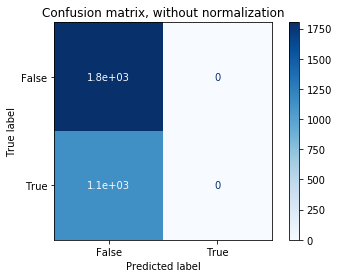

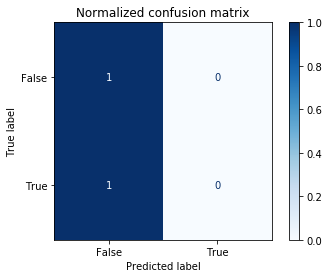

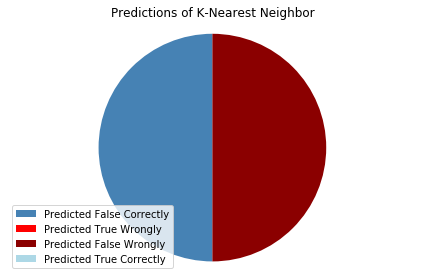

In [26]:
class_names = ['False','True']
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knc, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
plt.show()

cmKNN = confusion_matrix(y_test, pred_knc,normalize=normalize)

sKNN = np.array(cmKNN[0])
sizesKNN = np.append (sKNN, cmKNN[1])

# -- coding: UTF-8 --
import matplotlib.pyplot as plt
# The slices will be ordered and plotted counter-clockwise.
labels = [r'Predicted False Correctly', r'Predicted True Wrongly',  r'Predicted False Wrongly',
r'Predicted True Correctly']
colors = ['steelblue', 'red', 'darkred', 'lightblue']
patches, texts = plt.pie(sizesKNN, colors=colors, startangle=90)
plt.legend(patches, labels, loc="lower left")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.title('Predictions of K-Nearest Neighbor')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Experimental evaluation

## Compare algorithm performance metrics

### *Precision*

Precision is the measure of the correctly identified entries from all the entries that were predicted as that label, this means that precision is, for example, True Positive / (False Positive + True Positive), this applies to both labels Positive(True) and Negative(False).

,Algorithm,Label,Precision
0,RF,True,0.533819
1,RF,False,0.684024
2,SVM,True,0.437500
3,SVM,False,0.614201
4,NN,True,0.487207
5,NN,False,0.659670


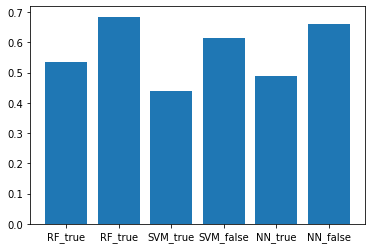

In [27]:
RF_true_precision =  reportRF['True']['precision'] 
RF_false_precision =  reportRF['False']['precision'] 

SVM_true_precision =  reportSVM['True']['precision'] 
SVM_false_precision =  reportSVM['False']['precision'] 

NN_true_precision =  reportNN['True']['precision'] 
NN_false_precision =  reportNN['False']['precision'] 


precision_df = pd.DataFrame({'Algorithm': ['RF','RF', 'SVM', 'SVM','NN','NN'], 'Label': [True, False,True, False,True, False], 'Precision': [RF_true_precision,RF_false_precision,SVM_true_precision,SVM_false_precision,NN_true_precision,NN_false_precision ]})

display(precision_df)
    
height = [RF_true_precision, RF_false_precision, SVM_true_precision, SVM_false_precision, NN_true_precision,NN_false_precision]
bars = ('RF_true', 'RF_true', 'SVM_true', 'SVM_false', 'NN_true','NN_false')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

### *Recall*

The recall is the measure of the correctly identified positive/negative cases from all the actual positive/negative cases. This means that instead of the True Positive or True Negative values being divided by the sum of all entries predicted as that label they are divided by the actual number of entries that are either positive(True) or negative(False).

,Algorithm,Label,Recall
0,RF,True,0.450791
1,RF,False,0.751249
2,SVM,True,0.030756
3,SVM,False,0.975014
4,NN,True,0.401582
5,NN,False,0.732926


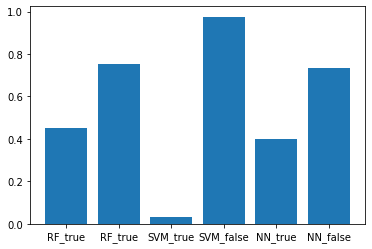

In [28]:

RF_true_recall =  reportRF['True']['recall'] 
RF_false_recall =  reportRF['False']['recall']

SVM_true_recall =  reportSVM['True']['recall'] 
SVM_false_recall =  reportSVM['False']['recall']

NN_true_recall =  reportNN['True']['recall']
NN_false_recall =  reportNN['False']['recall'] 


recall_df =pd.DataFrame({'Algorithm': ['RF','RF', 'SVM', 'SVM','NN','NN'], 'Label': [True, False,True, False,True, False], 'Recall': [RF_true_recall,RF_false_recall,SVM_true_recall,SVM_false_recall,NN_true_recall,NN_false_recall ]})


display(recall_df)
    
height = [RF_true_recall, RF_false_recall, SVM_true_recall, SVM_false_recall, NN_true_recall,NN_false_recall]
bars = ('RF_true', 'RF_true', 'SVM_true', 'SVM_false', 'NN_true','NN_false')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

### *Accuracy*

Accuracy is the measure of the correctly identified entries from all entries. In a situation where all outcomes(True Positive, False Positive, True Negative, False Negative) have the same importance, accuracy is better than F-score.

,Algorithm,Accuracy
0,RF,0.634910
1,SVM,0.609391
2,NN,0.604627


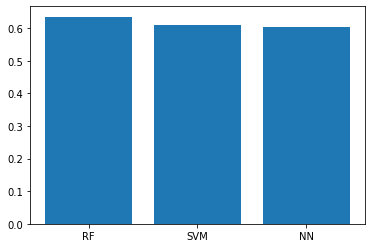

In [29]:
RF_accuracy =  reportRF['accuracy']
SVM_accuracy =  reportSVM['accuracy']
NN_accuracy =  reportNN['accuracy']


accuracy_df =pd.DataFrame({'Algorithm': ['RF', 'SVM','NN'], 'Accuracy': [RF_accuracy,SVM_accuracy,NN_accuracy ]})


display(accuracy_df)
    
height = [RF_accuracy, SVM_accuracy, NN_accuracy]
bars = ('RF','SVM','NN')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

### *F-measure*
The F-measure or F-Score is an accurate indicator for the incorrectly classified prediction results, it takes into account Recall and Precision and performs a harmonized mean of the two to get its value. It provides a more reliable measure of the incorrectly classified cases than the *Accuracy* and as so it is the better metric to use when False Positives and False Negatives are more important than True Positives or True Negatives.

,Algorithm,Label,F1-Score
0,RF,True,0.488804
1,RF,False,0.716062
2,SVM,True,0.057471
3,SVM,False,0.753648
4,NN,True,0.440270
5,NN,False,0.694371


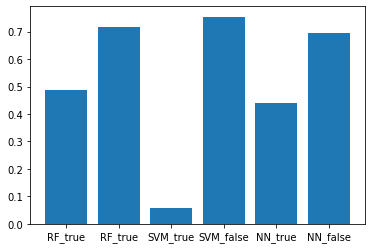

In [30]:
RF_true_f1 =  reportRF['True']['f1-score'] 
RF_false_f1 =  reportRF['False']['f1-score']

SVM_true_f1 =  reportSVM['True']['f1-score']
SVM_false_f1 =  reportSVM['False']['f1-score']

NN_true_f1 =  reportNN['True']['f1-score']
NN_false_f1 =  reportNN['False']['f1-score']

f1_df =pd.DataFrame({'Algorithm': ['RF','RF', 'SVM', 'SVM','NN','NN'], 'Label': [True, False,True, False,True, False], 'F1-Score': [RF_true_f1,RF_false_f1,SVM_true_f1,SVM_false_f1,NN_true_f1,NN_false_f1 ]})
display(f1_df)
    
height = [RF_true_f1, RF_false_f1, SVM_true_f1, SVM_false_f1, NN_true_f1,NN_false_f1]
bars = ('RF_true', 'RF_true', 'SVM_true', 'SVM_false', 'NN_true','NN_false')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

### Run time

In this section, we compare the time it took to run the prediction using each algorithm. With the amount of test data, we have the runtimes are small so this isn’t a big factor however as the number of days in the data increases the importance of a fast scalable algorithm would also increase.

,Algorithm,Runtime
0,RF,6.083433
1,SVM,7.337272
2,NN,13.298021


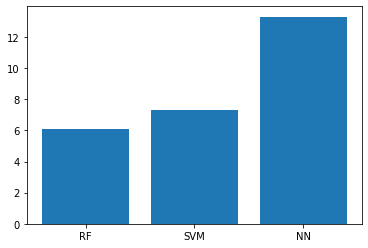

In [31]:
runtime_df =pd.DataFrame({'Algorithm': ['RF','SVM','NN'], 'Runtime': [elapsed_rf,elapsed_svm,elapsed_NN]})
display(runtime_df)
    
height = [elapsed_rf, elapsed_svm, elapsed_NN]
bars = ('RF', 'SVM', 'NN')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

# Conclusions

In this section we aim to draw conclusions from the data collected in the previous sections and its statistical meaning, we will explain which algorithm we deem best for this particular dataset, what algorithms we consider bad and attempt to explain the tendency all the algorithms presented towards predicting the dependent variable to be *False*.

## Comparing Algorithms

Firstly we must address the fact that two algorithms are practically the only two that can be compared in order to clarify the best one, due to the fact that SVM and KNN almost exclusively predicted *False* and although SVM got a 60% accuracy whilst doing this, that was only because around 60% of the data tested was *False* and should by no means considered a good prediction. The two better-performing algorithms are the *Random Forest* algorithm and the *Neural Networks* algorithm which while still leaning towards *False* predictions predicted a much more reasonable number of *True* outcomes.

The point in which we can see the highest difference between both algorithms is in runtime, *Neural Networks* take double the time to run when compared to the *Random Forest* like we mentioned before currently, the runtime isn't a major concern because the test data is small, around three thousand entries, however, looking at scalability as the number of days would increase the *Neural Networks* algorithm would also increase its runtime drastically.

As with runtime, in almost all other metrics taken the *Random Forest* algorithm performed slightly better than the *Neural Networks*, providing better *accuracy*, *f1-score*, *precision* and *recall* values although most of these differences were small they in conjunction with runtime are the differentiators when determining what we consider the best algorithm.

Purely out of the results obtained we must conclude that the *Random Forest* algorithm performed better out of the four algorithms we attempted to use, however, the *Neural Networks* algorithm should also be considered an option although one we believe would be less scalable when it comes down to runtime.

## Worst Algorithms

The algorithms with the worst predictions were the *K-Nearest Neighbor* (KNN) and the *Support Vector Machine* (SVM), these algorithms showed great difficulties in predicting the times when COVID-19 cases increased. 

It should be noted that KNN always predicted that COVID-19 cases would not increase, while SVM did predict that the number of contaminated would increase, although very rarely (to have a better perspective, SVM predicted a total of 80 trues when the true value was 1100, predicting rightly only 35 times). 

We believe that the reason that these algorithms gave such bad predictions was that we had insufficient data, both in quantity and quality.


## Overall Classification Results

Even in the best-performing algorithms the classification results achieved weren't very good, we mostly believe this is due to the small correlations that the data numbers would have with the dependent variable, however in the context of this data we struggled to find other possible dependent categorical variables.

These inconsistencies in the data correlations can be observed specifically in the predictions of the algorithms being skewed towards *False* in all algorithms, some even to extreme points that made said algorithms unusable.

# References

- [Original Dataset Kaggle Page](https://www.kaggle.com/imdevskp/corona-virus-report)
- [Scikit-Learn Tutorial](https://www.youtube.com/watch?time_continue=4&v=0Lt9w-BxKFQ&feature=emb_logo)
- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
- [MatPlotLib](https://matplotlib.org/tutorials/introductory/pyplot.html)
- [Numpy](https://numpy.org/devdocs/user/quickstart.html)
- [Data Scaling](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)
- [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
- [Random Forest](https://en.wikipedia.org/wiki/Random_forest)
- [Support Vector Machine](https://en.wikipedia.org/wiki/Support_vector_machine)
- [Neural Networks](https://pathmind.com/wiki/neural-network)
- [K-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
- [Performance Metrics](https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2)